# Importação de bibliotecas

In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [71]:
sns.set_style('darkgrid')

# Importação de dados (df)

In [72]:
df = pd.read_csv(os.path.abspath('../dados/insurance.csv'))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Análises estatística

## Análise exploratória

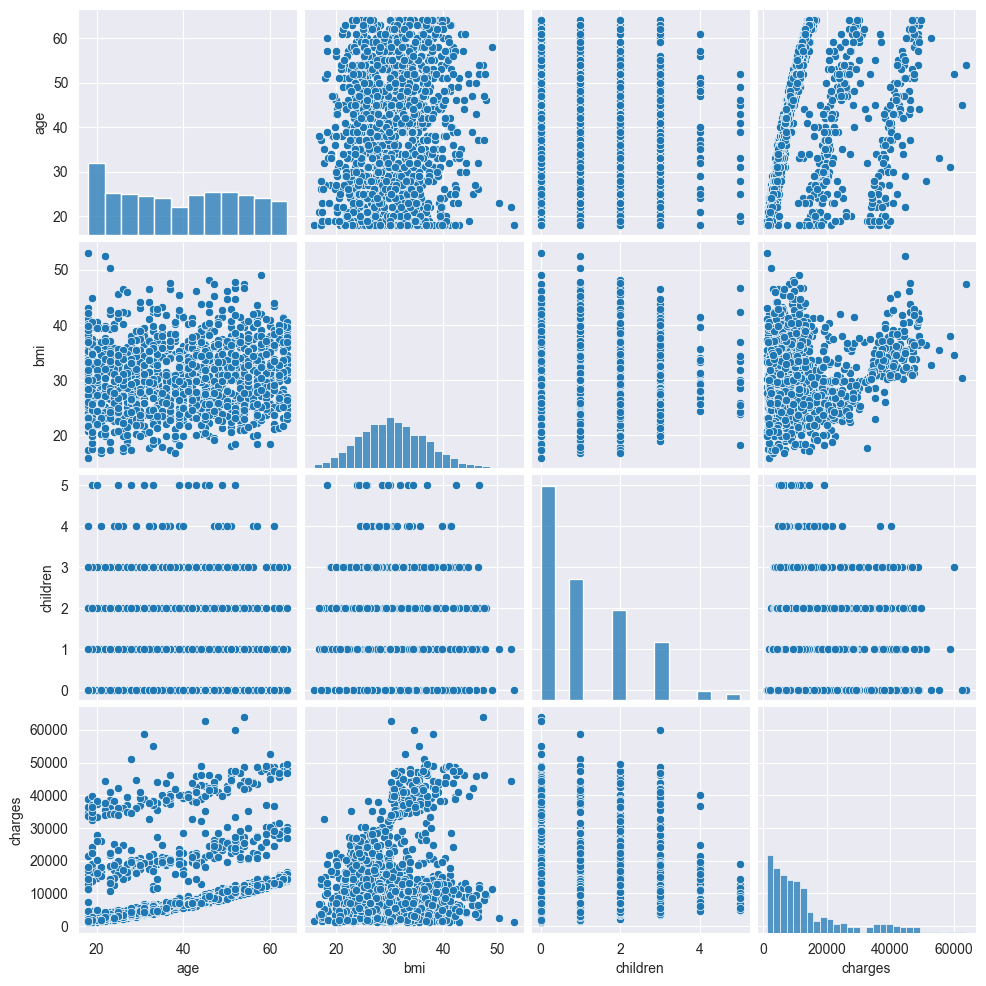

In [73]:
sns.pairplot(df)

In [584]:
quantile_charges = df[['charges']].quantile(0.75)[0]

In [586]:
df = df.loc[df['charges'] <= quantile_charges]

<AxesSubplot: >

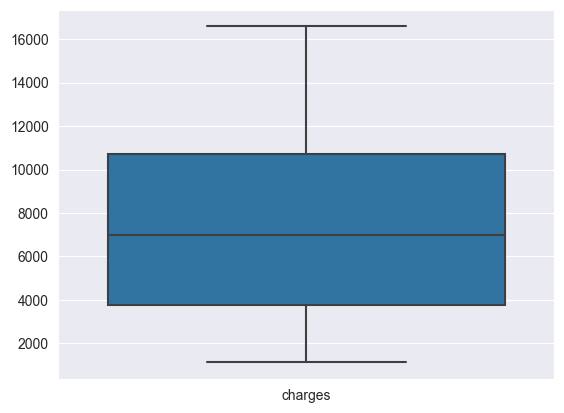

In [589]:
sns.boxplot(df[['charges']])

<AxesSubplot: xlabel='age', ylabel='charges'>

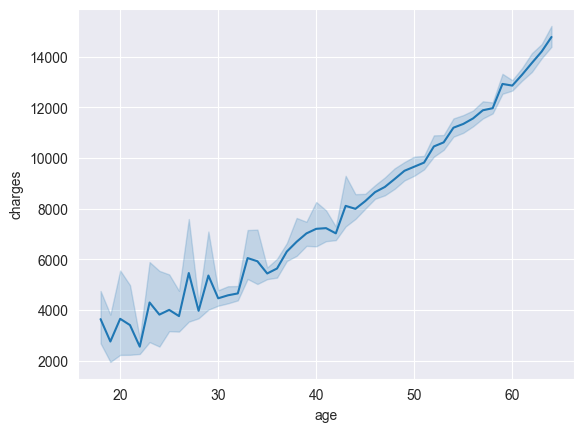

In [590]:
sns.lineplot(df[['age', 'charges']], x = 'age', y= 'charges')

<AxesSubplot: xlabel='sex', ylabel='charges'>

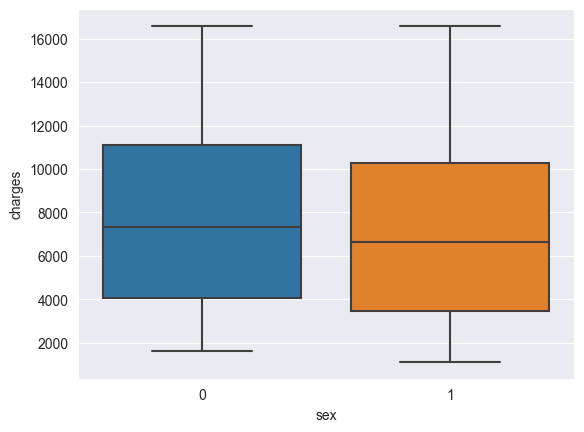

In [591]:
sns.boxplot(df, x = 'sex', y = 'charges')

<AxesSubplot: xlabel='age', ylabel='charges'>

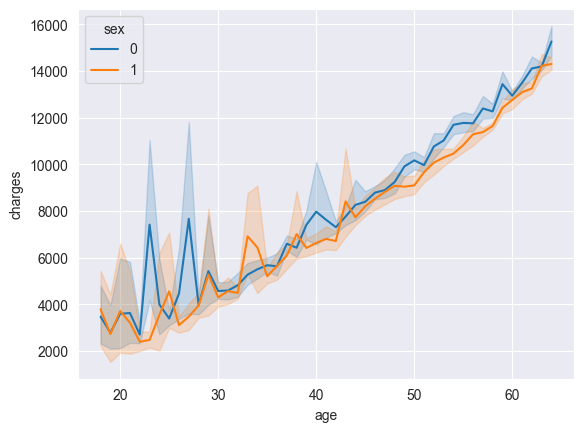

In [592]:
sns.lineplot(df, x = 'age', y= 'charges', hue = 'sex')

<AxesSubplot: xlabel='children', ylabel='charges'>

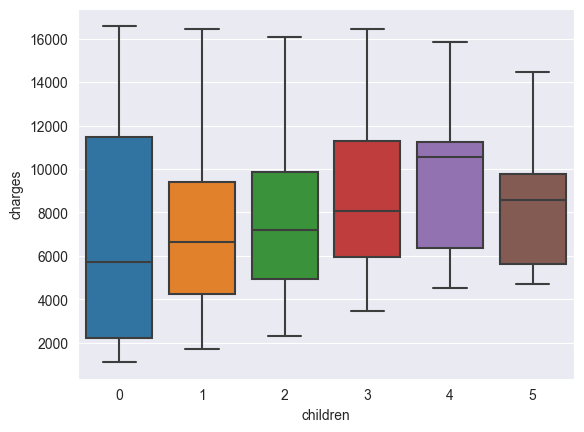

In [593]:
sns.boxplot(df, y= 'charges', x = 'children')

<AxesSubplot: xlabel='region', ylabel='charges'>

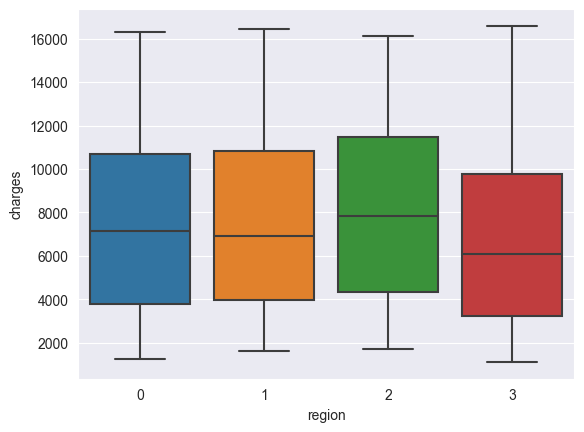

In [594]:
sns.boxplot(df, y= 'charges', x = 'region')

<AxesSubplot: xlabel='smoker', ylabel='charges'>

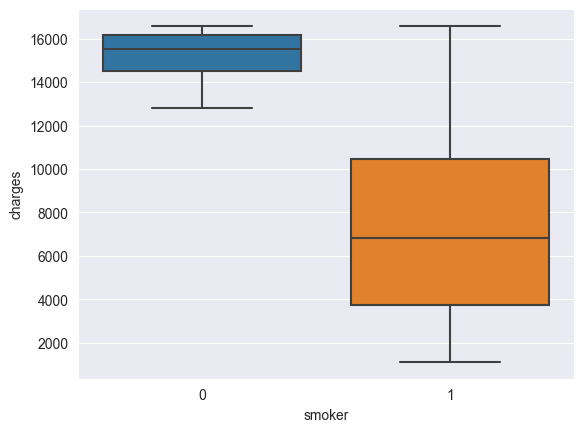

In [595]:
sns.boxplot(df, y= 'charges', x = 'smoker')

<AxesSubplot: >

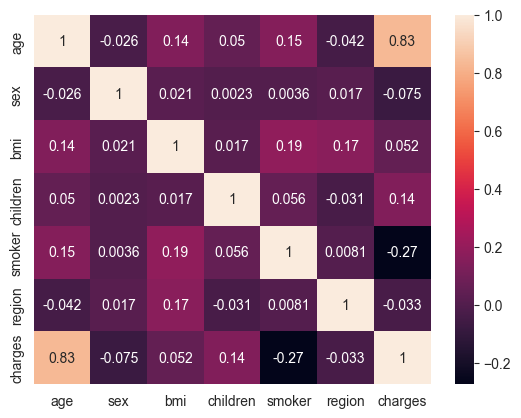

In [596]:
sns.heatmap(df.corr(), annot= True)

# Indexação de atributos

In [600]:
df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), [])))

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/141297884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), [])))


<AxesSubplot: xlabel='region', ylabel='charges'>

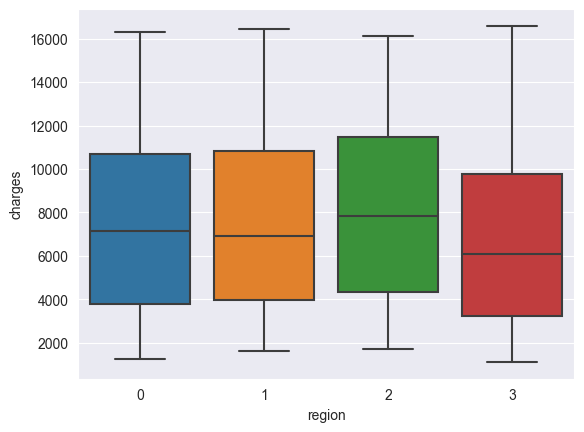

In [601]:
sns.boxplot(df, x = 'region', y = 'charges')

In [602]:
df.groupby('region').quantile(0.75).sort_values('charges')

,age,sex,bmi,children,smoker,charges
region,,,,,,
3,49.25,1.0,38.06000,2.0,1.0,9758.899425
0,52.00,1.0,34.40000,2.0,1.0,10678.948750
1,51.00,1.0,32.68000,2.0,1.0,10836.694000
2,51.75,1.0,32.46625,2.0,1.0,11465.462762


In [603]:
df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), [0,3,1,2])))

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/4110328555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), [0,3,1,2])))


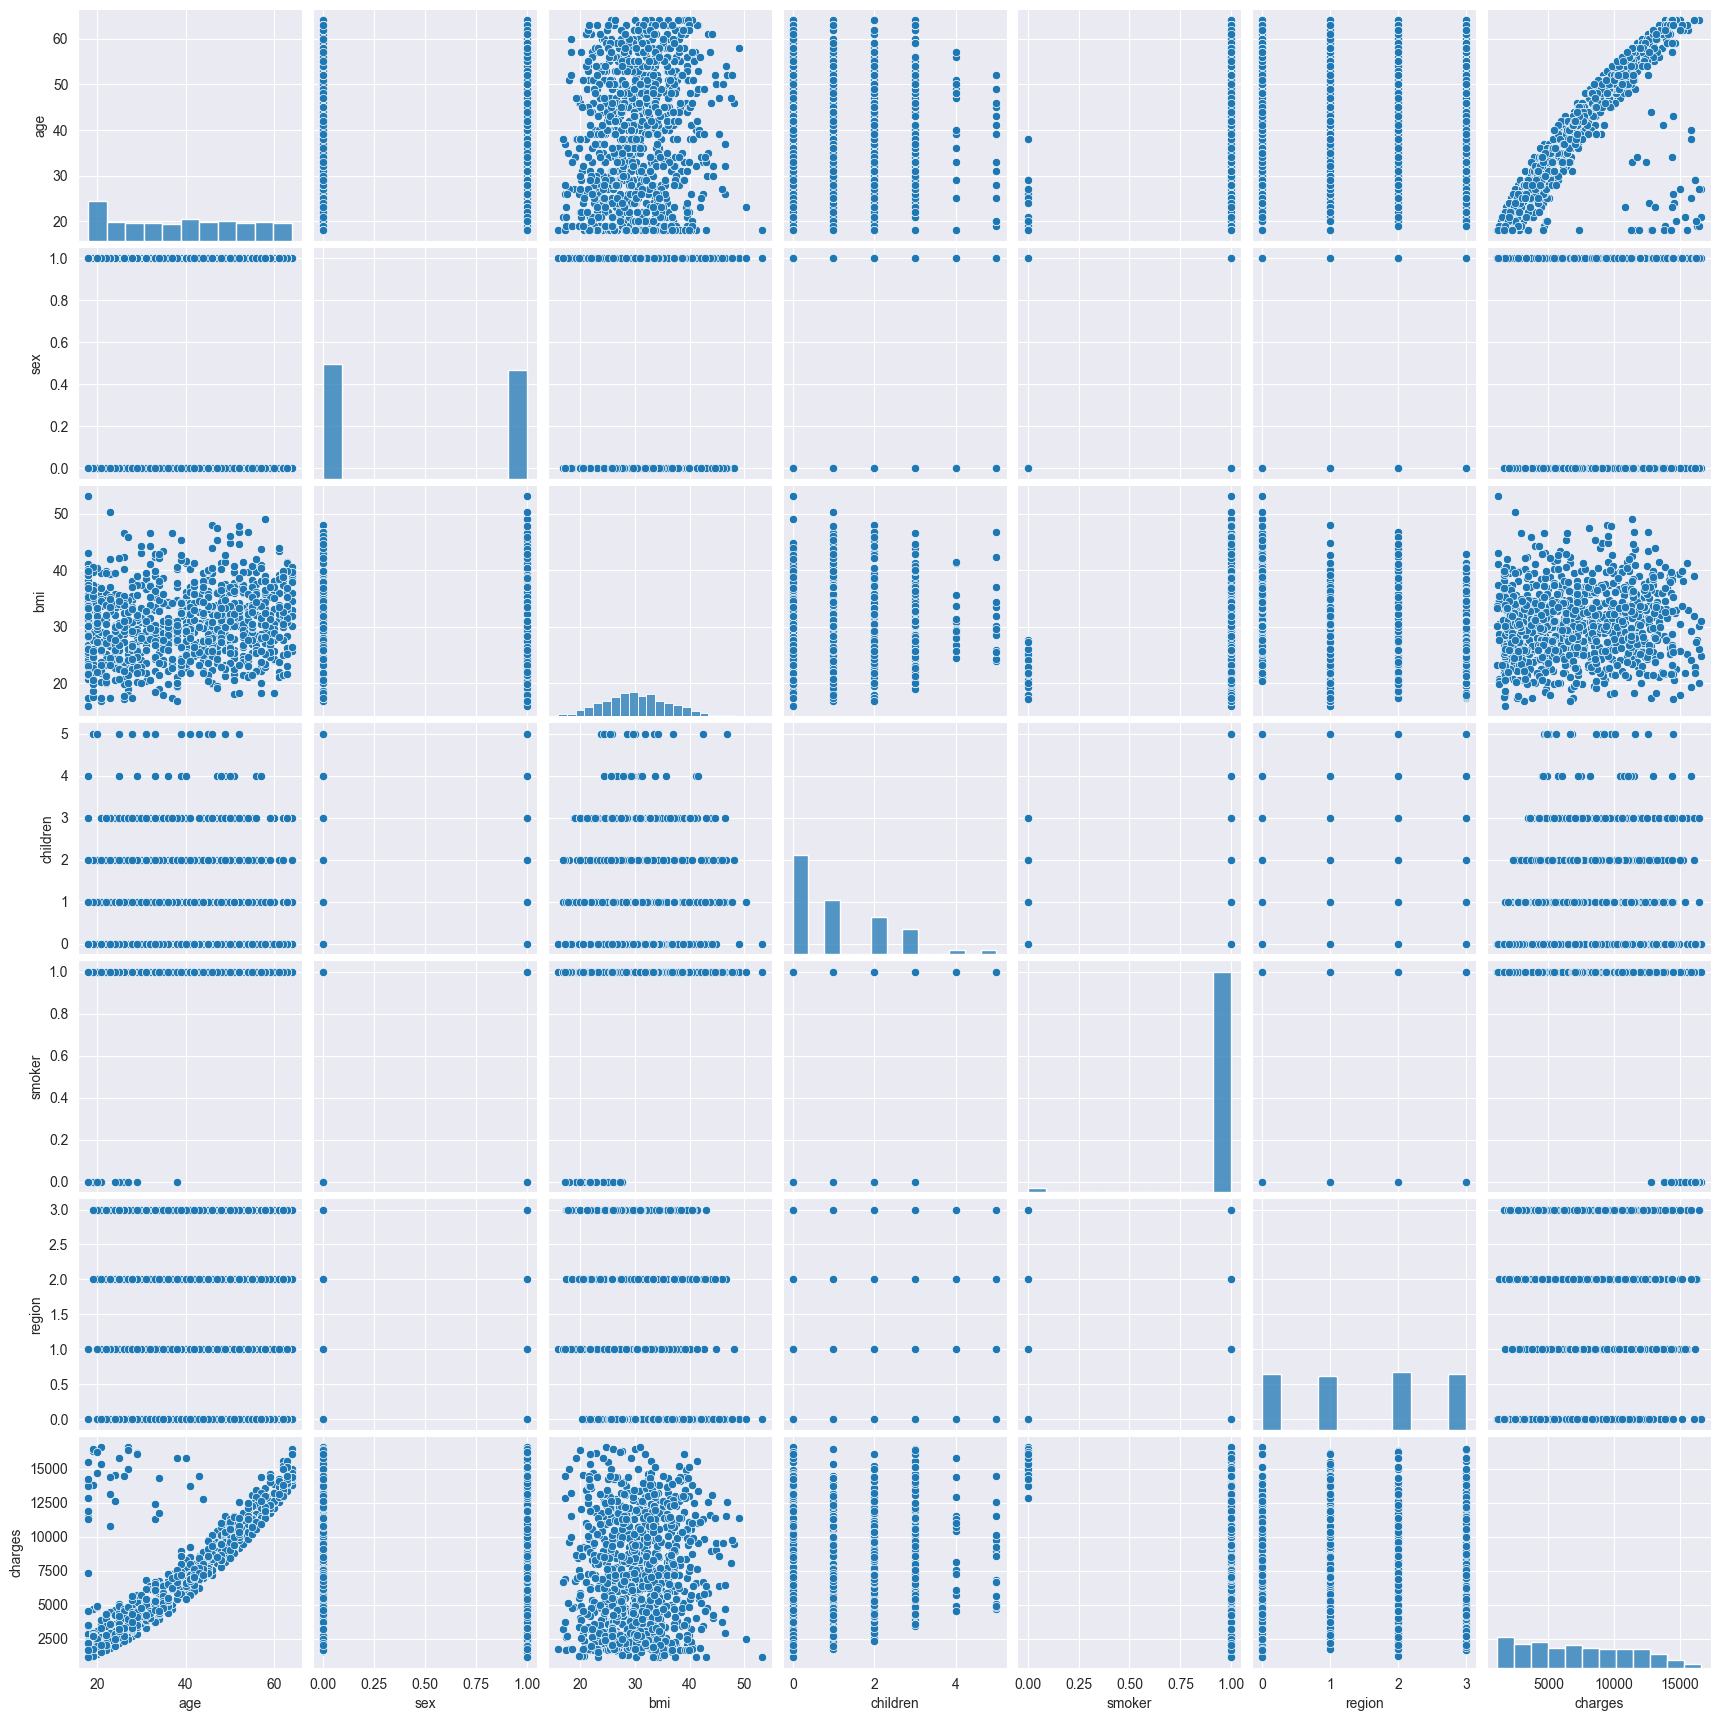

In [604]:
sns.pairplot(df)

<AxesSubplot: xlabel='smoker', ylabel='charges'>

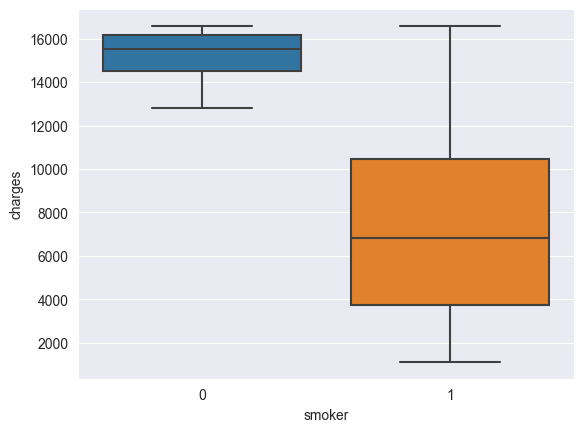

In [605]:
sns.boxplot(df, x = 'smoker', y = 'charges')

In [606]:
df.smoker = df.smoker.replace(to_replace = dict(zip(df.smoker.unique(), [0,1])))

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/1399298972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.smoker = df.smoker.replace(to_replace = dict(zip(df.smoker.unique(), [0,1])))


In [607]:
df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.77,1,0,0,1725.5523
2,28,1,33.00,3,0,0,4449.4620
4,32,1,28.88,0,0,3,3866.8552
5,31,0,25.74,0,0,0,3756.6216
6,46,0,33.44,1,0,0,8240.5896


In [608]:
df.sex = df.sex.replace(to_replace = dict(zip(df.sex.unique(), [0,1])))

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/1741544535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex = df.sex.replace(to_replace = dict(zip(df.sex.unique(), [0,1])))


In [609]:
df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,0,33.77,1,0,0,1725.5523
2,28,0,33.00,3,0,0,4449.4620
4,32,0,28.88,0,0,3,3866.8552
5,31,1,25.74,0,0,0,3756.6216
6,46,1,33.44,1,0,0,8240.5896


<AxesSubplot: >

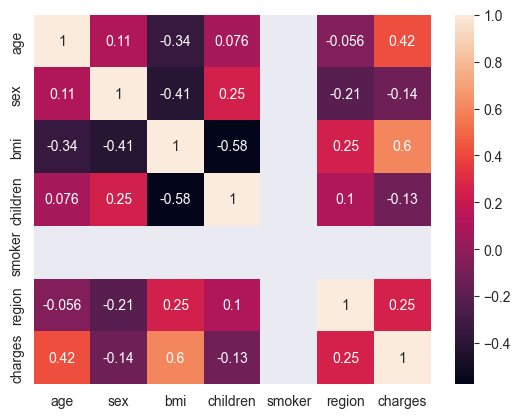

In [610]:
sns.heatmap(df.loc[df.smoker == 1].corr(), annot = True)

# Criação do modelo OLS - 2

In [611]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

$R^2$ - ['age', 'smoker', 'bmi']: 77.7, 5680 <br>
$R^2$ - ['age', 'sex', 'children', 'smoker', 'region']: 73.4, 6174 <br>
$R^2$ - ['age', 'sex', 'children', 'smoker', 'region', 'bmi']: 73.6, 5691 <br>
$R^2$ - ['age', 'smoker', 'bmi', 'children']: 78, 5650 <br>
$R^2$ - ['age', 'smoker', 'bmi', 'children', 'sex]: 78, 5650 <br>

In [612]:
X =  sm.add_constant(df[['age', 'smoker', 'bmi', 'children', 'sex']])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

mod = sm.OLS(y_train, X_train, hasconst = True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     949.7
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          5.29e-308
Time:                        14:13:18   Log-Likelihood:                -6106.3
No. Observations:                 702   AIC:                         1.222e+04
Df Residuals:                     696   BIC:                         1.225e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3679.9685    312.434    -11.778      0.000   -4293.395   -3066.542
age          254.5161      3.982     63.917      0.000     246.698     262.334
smoker      1.251e+04    404.080     30.967      0.000    1.17e+04    1.33e+04
bmi            6.7668      8.776      0.771      0.441     -10.463      23.997
children     406.8390     45.336      8.974      0.000     317.828     495.850
sex          409.9215    110.192      3.720      0.000     193.574     626.269
==============================================================================
Omnibus:                      812.381   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55513.750
Skew:                           5.711   Prob(JB):                         0.00
Kurtosis:                      45.041   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression

In [613]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [614]:
from statsmodels.regression.linear_model import PredictionResults

In [615]:
y_pred_ols = res.predict(X_test)

In [616]:
predictions = res.get_prediction(X_test)
conf_int_pred = predictions.conf_int(alpha = 0.05)

In [617]:
pred_conf = pd.DataFrame(conf_int_pred)
pred_conf['y_test'] = y_test.reset_index(drop=True)

<AxesSubplot: >

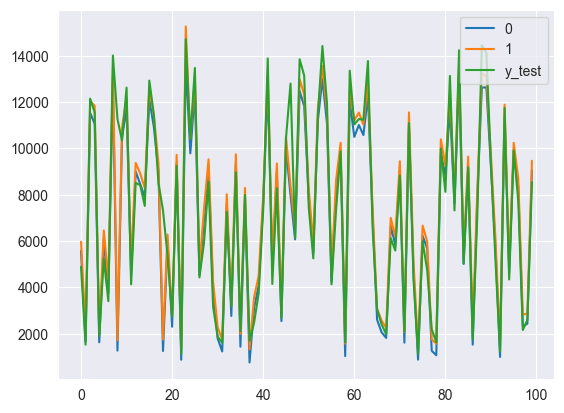

In [618]:
pred_conf[0:100].plot()

In [619]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred_ols ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred_ols ) )

RMSE:  1319.8287430961514
R-squared:  0.891511616875979


In [620]:
lr = LinearRegression()

lr.fit( X_train , y_train)


LinearRegression()

In [621]:
#get intercept
print( lr.intercept_ )
#get slope
print( lr.coef_ )

-3679.968528825657
[0.00000000e+00 2.54516117e+02 1.25132331e+04 6.76677135e+00
 4.06839009e+02 4.09921522e+02]


In [622]:
y_pred_lr = lr.predict(X_test)

In [623]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred_lr ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred_lr ) )

RMSE:  1319.8287430961511
R-squared:  0.891511616875979


<AxesSubplot: ylabel='charges'>

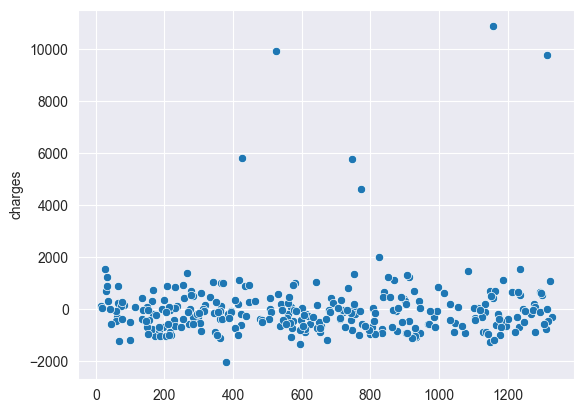

In [624]:
y_resid = y_test - y_pred_lr
y_resid_2 = (y_test - y_pred_lr) **2
sns.scatterplot(y_resid)

<AxesSubplot: ylabel='charges'>

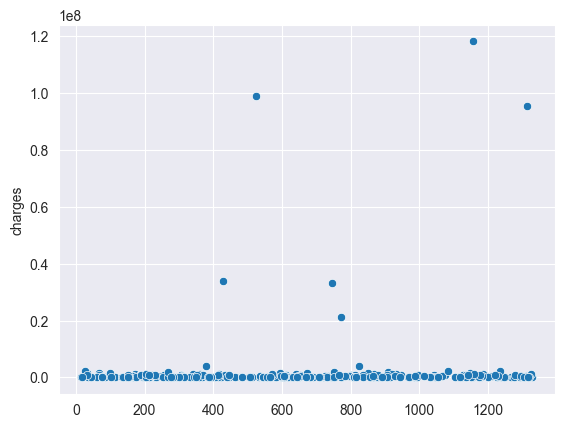

In [625]:
sns.scatterplot(y_resid_2)

In [626]:
df_resid = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred_lr, 'y_resid':y_resid, 'y_resid_2':y_resid_2})

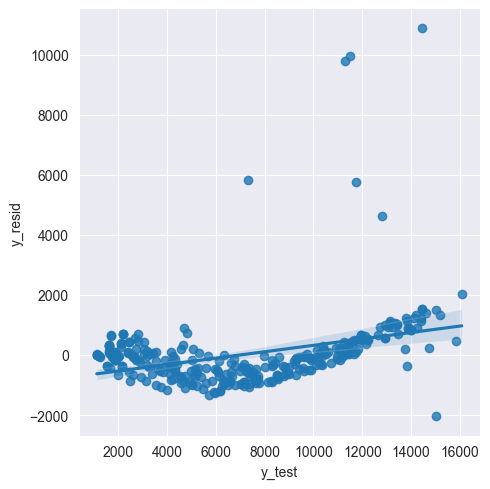

In [627]:
sns.lmplot(data = df_resid, x = 'y_test' , y = 'y_resid')

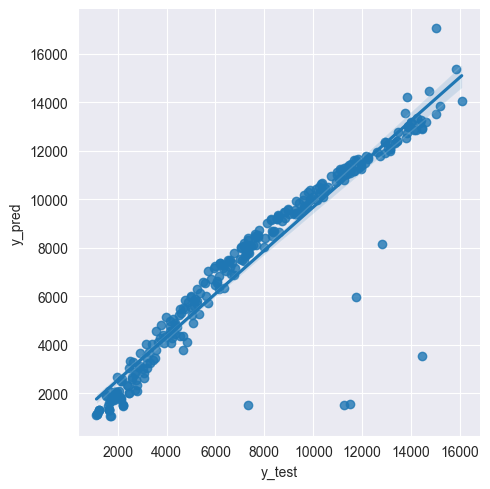

In [628]:
sns.lmplot(data = df_resid, x = 'y_test' , y = 'y_pred')

<AxesSubplot: xlabel='y_resid', ylabel='Count'>

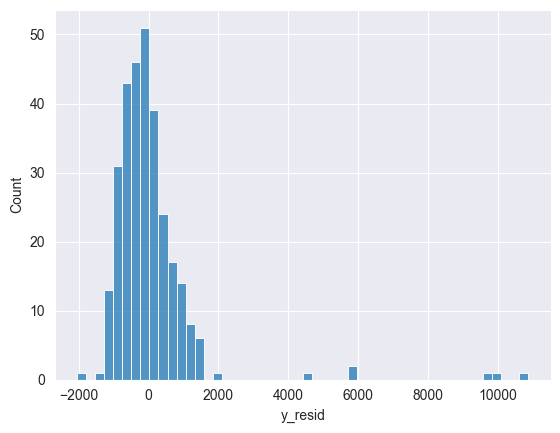

In [629]:
sns.histplot(df_resid['y_resid'])

In [630]:
df_resid.head()

,y_test,y_pred,y_resid,y_resid_2
346,4889.99950,5774.653415,-884.653915,782612.549224
478,1534.30450,1914.225446,-379.920946,144339.925047
715,12146.97100,11786.558164,360.412836,129897.412158
568,11552.90400,11451.297760,101.606240,10323.827963
751,1906.35825,1860.937121,45.421129,2063.078922


<AxesSubplot: >

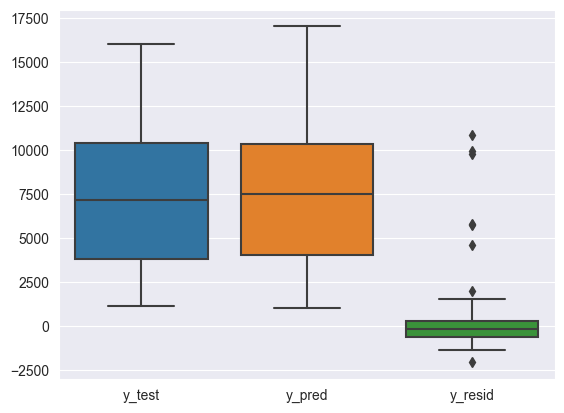

In [634]:
sns.boxplot(df_resid[['y_test', 'y_pred', 'y_resid']])

In [635]:
from statsmodels.api import qqplot

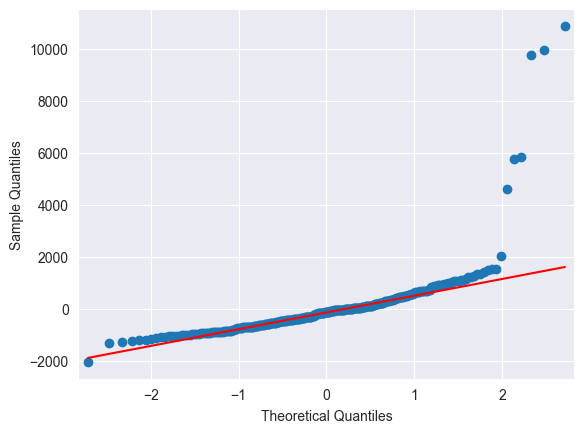

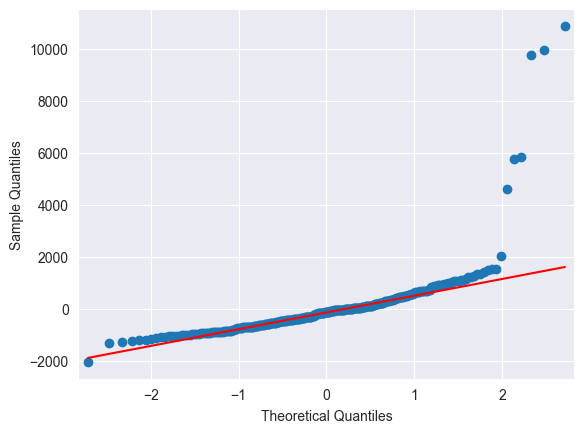

In [638]:
qqplot(y_resid, line='q')